In [4]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense
from keras.layers import Dropout,Activation,Flatten
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

Using TensorFlow backend.


In [5]:
NUM_CLASSES =10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train =X_train.astype('float32')/ 255.0
X_test =X_test.astype('float32')/ 255.0

y_train=keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test=keras.utils.to_categorical(y_test,NUM_CLASSES)

In [9]:
TYPE_MAP ={
    
    0:u'Uçak',
    1:'Otomobil',
    2:u'Kuş',
    3:'Kedi',
    4:u'Geyik',
    5:u'Köpek',
    6:u'Kurbağa',
    7:'At',
    8:'Gemi',
    9:'Kamyon'
}

Resmin cinsi: Kurbağa


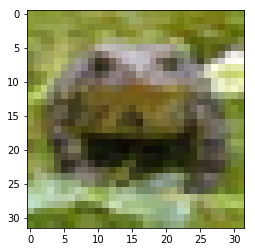

In [10]:
dataset_size=X_train.shape[0]

idx=random.randint(0,dataset_size)

sample_img =X_train[idx]
sample_label=np.argmax(y_train[idx])

print(u"Resmin cinsi: %s" % TYPE_MAP[sample_label])
plt.imshow(sample_img)

In [11]:
input_shape =X_train.shape[1:]

model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=input_shape,activation='relu'))
model.add(Activation('relu'))

model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128,activation='relu'))
model.add(Dense(NUM_CLASSES,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.rmsprop(lr=1e-4,decay=1e-6),metrics=['accuracy'])






In [12]:
model.fit(X_train,y_train,batch_size=10,epochs=10,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
   90/50000 [..............................] - ETA: 45:06 - loss: 2.3373 - acc: 0.0556

KeyboardInterrupt: 

In [13]:
model.evaluate(X_test,y_test,verbose=1) 

10000/10000 [==============================] - 69s 7ms/step


[2.3042836471557617, 0.1009]

Resmin cinsi: Kamyon
Resmin Uçak olma ihtimali: 11.793373%
Resmin Otomobil olma ihtimali: 9.253360%
Resmin Kuş olma ihtimali: 9.207941%
Resmin Kedi olma ihtimali: 9.814619%
Resmin Geyik olma ihtimali: 10.427108%
Resmin Köpek olma ihtimali: 9.010034%
Resmin Kurbağa olma ihtimali: 9.378299%
Resmin At olma ihtimali: 10.980573%
Resmin Gemi olma ihtimali: 9.930818%
Resmin Kamyon olma ihtimali: 10.203872%


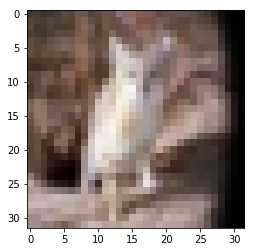

In [16]:
idx=random.randint(0,X_test.shape[0])

sample_img =X_test[idx]
sample_label=np.argmax(y_train[idx])

print(u"Resmin cinsi: %s" % TYPE_MAP[sample_label])
plt.imshow(sample_img)

sample_img=sample_img.reshape(1,32,32,3)
for i,v in enumerate(model.predict(sample_img)[0]):
    print(u'Resmin %s olma ihtimali: %.6f%%' % (TYPE_MAP[i],v *100))

In [22]:
model.save_weights('cifar10-cnn.h5')

In [23]:
model.load_weights('cifar10-cnn.h5')

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________